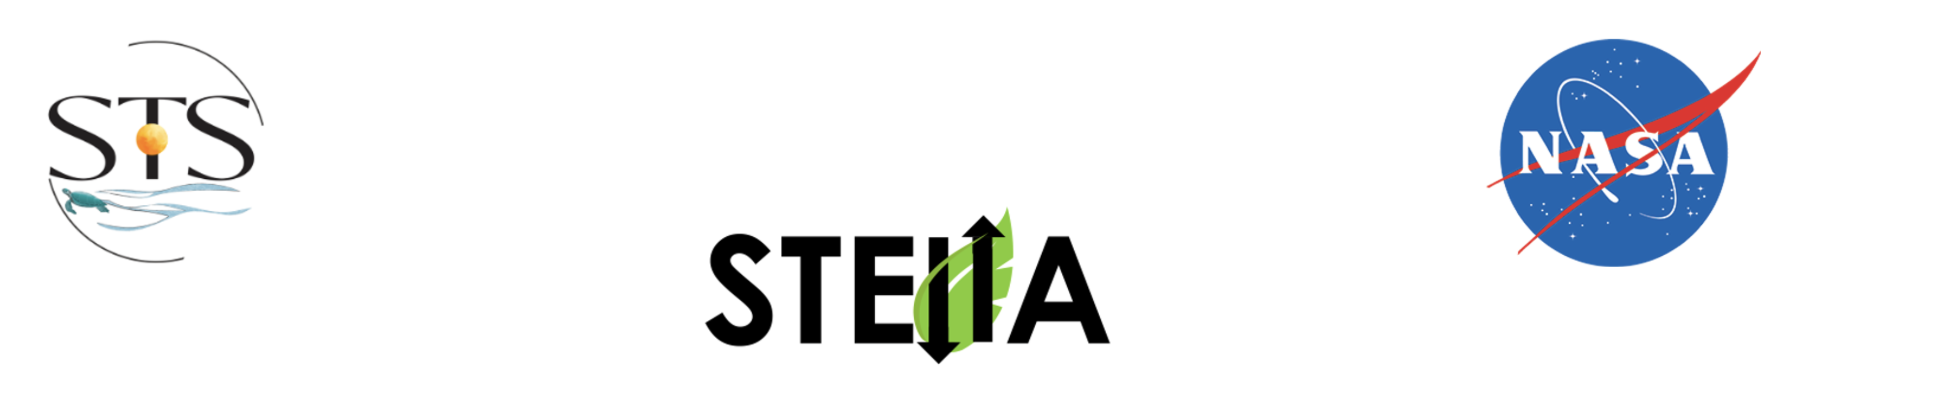


# Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer

The **Science and Technology Society (STS) of Sarasota-Manatee Counties, Florida** is working with the NASA STELLA (Science and Technology Education for Land/Life Assessment) outreach program as a part of our STEM initiative. According to their site, 

- "NASA STELLA instruments are portable low-cost do-it-yourself (DIY) instruments that support science education, and outreach through scientific engagement, inquiry, and discovery while helping you understand Landsat better". 

**STELLA instruments are developed under the influence and inspiration of Landsat.** This alignment not only fulfills our project needs but also serves as a compelling addition to our STEAM initiatives:

1) To train the minds young Floridians to be more aware of our wetlands, to care for them and about them.  Our program will bring more community publicity to the issue of wetlands change, as well.

2) To expose our middle- and high- school aged students to real science, using real data.  That means how to use instrumentation and understand how the data is collected, and how the data can be used in the real world.  It means not only to create beautiful charts and images that form the good results, but also to understand that data must be collected in a proper and reproducible way, that there physics reasons for lack of accuracy and lack of precision that one must understand and minimize in order to achieve meaningful results.


The NASA STELLA-Q2 is capable of making 18 different spectral measurements from the violet/blue portions of the electromagnetic spectrum out to near infrared regions (beyond our range of vision).The following figure **(1)** shows the visible spectrum by wavelength, and the yellow box indicates the STELLA-Q2 frequency range. 

>![image](Spectrum.png)


More can be found on the STELLA DIY instruments at the following link.

>https://landsat.gsfc.nasa.gov/stella/

The following is a sample-by-sample animation of the type of data acquired from STELLA-Q2 Spectrometer built by STS. STS is providing the python code in a Jupyter Notebook that can be used as an example of how to display the data from the STELLA-Q2 device. We have also provided some sample data to be used with this notebook. It should be noted that we did change the name of some of the headers created from our instrument to add colors to each of the wavelength reading that are made in order to display each wavelength as a corresponding color. The near infrared wavelength readings are colored in grays, wheat and gold where the normal visible spectrum colors are in vivid colors that they represent. 

>
>![image](STELLA_color.gif)
>


### Load Python requirments:

In [1]:
import altair as alt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

####import panel as pn

#pn.extension('vega')
#pn.extension('tabulator')

#####pn.extension(sizing_mode = 'stretch_width')

#######alt.data_transformers.disable_max_rows()

import re
import ipywidgets as widgets
from IPython.display import display


---
---
# New Test, 4 readings (White Card, Grass, Shady Grass and Shady White Card.

- Turned STELLA-Q2 on and off to switch batch numbers except for Shady grass that was a transition on the 2nd batch. 

## Read in Excel data file collected on the STELLA-Q2 micro SD card:

In [2]:
#read the file
file = r'data_white_grass_shade_whiteshade.xlsx'
grass = pd.read_excel(file,index_col=False)

# Remove leading/trailing whitespaces in column names
grass.columns = grass.columns.str.strip()
grass.head()

,device_type,software_version,UID,Test,batch,weekday,timestamp_iso8601,decimal_hour,bandwidth_FWHM_nm,field_of_view_FWHM_DEG,...,irradiance_900nm_wheat_wavelength_nm,irradiance_900nm_wheat_wavelength_uncertainty_nm,irradiance_900nm_wheat_irradiance_uW_per_cm_squared,irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared,irradiance_940nm_gold_wavelength_nm,irradiance_940nm_gold_wavelength_uncertainty_nm,irradiance_940nm_gold_irradiance_uW_per_cm_squared,irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared,battery_voltage,battery_percent
0,STELLA-Q2,2.4.0,6858,White Card,1,Friday,20240209T192947Z,19.4964,20,20,...,900,10,5217.29,626.075,940,10,3449.99,413.999,4.16,98
1,STELLA-Q2,2.4.0,6858,White Card,1,Friday,20240209T192949Z,19.4969,20,20,...,900,10,5314.53,637.744,940,10,3517.93,422.152,4.16,98
2,STELLA-Q2,2.4.0,6858,White Card,1,Friday,20240209T192950Z,19.4972,20,20,...,900,10,5423.45,650.814,940,10,3606.17,432.740,4.16,98
3,STELLA-Q2,2.4.0,6858,White Card,1,Friday,20240209T192952Z,19.4978,20,20,...,900,10,5565.70,667.884,940,10,3707.64,444.917,4.16,98
4,STELLA-Q2,2.4.0,6858,White Card,1,Friday,20240209T192953Z,19.4980,20,20,...,900,10,5476.79,657.215,940,10,3658.23,438.987,4.16,98


## Explore the data:

In [3]:
grass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 84 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   device_type                                                           149 non-null    object 
 1   software_version                                                      149 non-null    object 
 2   UID                                                                   149 non-null    int64  
 3   Test                                                                  149 non-null    object 
 4   batch                                                                 149 non-null    int64  
 5   weekday                                                               149 non-null    object 
 6   timestamp_iso8601                                                     149 non-null    object 
 7  

## We did alter the original code.py file on the STELLA-Q2 to use actual color names for the following column data vs. *near IR* as in the original STELLA-Q2 code.py code file.

     49   irradiance_680nm_black_wavelength_nm                                  60 non-null     int64  
     50   irradiance_680nm_black_wavelength_uncertainty_nm                      60 non-null     int64  
     51   irradiance_680nm_black_irradiance_uW_per_cm_squared                   60 non-null     float64
     52   irradiance_680nm_black_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     53   irradiance_705nm_brown_wavelength_nm                                  60 non-null     int64  
     54   irradiance_705nm_brown_wavelength_uncertainty_nm                      60 non-null     int64  
     55   irradiance_705nm_brown_irradiance_uW_per_cm_squared                   60 non-null     float64
     56   irradiance_705nm_brown_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     57   irradiance_730nm_gray_wavelength_nm                                   60 non-null     int64  
     58   irradiance_730nm_gray_wavelength_uncertainty_nm                       60 non-null     int64  
     59   irradiance_730nm_gray_irradiance_uW_per_cm_squared                    60 non-null     float64
     60   irradiance_730nm_gray_irradiance_uncertainty_uW_per_cm_squared        60 non-null     float64
     61   irradiance_760nm_silver_wavelength_nm                                 60 non-null     int64  
     62   irradiance_760nm_silver_wavelength_uncertainty_nm                     60 non-null     int64  
     63   irradiance_760nm_silver_irradiance_uW_per_cm_squared                  60 non-null     float64
     64   irradiance_760nm_silver_irradiance_uncertainty_uW_per_cm_squared      60 non-null     float64
     65   irradiance_810nm_lightgray_wavelength_nm                              60 non-null     int64  
     66   irradiance_810nm_lightgray_wavelength_uncertainty_nm                  60 non-null     int64  
     67   irradiance_810nm_lightgray_irradiance_uW_per_cm_squared               60 non-null     float64
     68   irradiance_810nm_lightgray_irradiance_uncertainty_uW_per_cm_squared   60 non-null     float64
     69   irradiance_860nm_linen_wavelength_nm                                  60 non-null     int64  
     70   irradiance_860nm_linen_wavelength_uncertainty_nm                      60 non-null     int64  
     71   irradiance_860nm_linen_irradiance_uW_per_cm_squared                   60 non-null     float64
     72   irradiance_860nm_linen_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     73   irradiance_900nm_wheat_wavelength_nm                                  60 non-null     int64  
     74   irradiance_900nm_wheat_wavelength_uncertainty_nm                      60 non-null     int64  
     75   irradiance_900nm_wheat_irradiance_uW_per_cm_squared                   60 non-null     float64
     76   irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     77   irradiance_940nm_gold_wavelength_nm                                   60 non-null     int64  
     78   irradiance_940nm_gold_wavelength_uncertainty_nm                       60 non-null     int64  
     79   irradiance_940nm_gold_irradiance_uW_per_cm_squared                    60 non-null     float64
     80   irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared        60 non-null     float64


In [4]:
grass.describe()

,UID,batch,decimal_hour,bandwidth_FWHM_nm,field_of_view_FWHM_DEG,irradiance_410nm_purple_wavelength_nm,irradiance_410nm_purple_wavelength_uncertainty_nm,irradiance_410nm_purple_irradiance_uW_per_cm_squared,irradiance_410nm_purple_irradiance_uncertainty_uW_per_cm_squared,irradiance_435nm_blue_wavelength_nm,...,irradiance_900nm_wheat_wavelength_nm,irradiance_900nm_wheat_wavelength_uncertainty_nm,irradiance_900nm_wheat_irradiance_uW_per_cm_squared,irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared,irradiance_940nm_gold_wavelength_nm,irradiance_940nm_gold_wavelength_uncertainty_nm,irradiance_940nm_gold_irradiance_uW_per_cm_squared,irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared,battery_voltage,battery_percent
count,149.0,149.000000,149.000000,149.0,149.0,149.0,149.0,149.000000,149.000000,149.0,...,149.0,149.0,149.000000,149.000000,149.0,149.0,149.000000,149.000000,149.000000,149.000000
mean,6858.0,1.953020,19.541803,20.0,20.0,410.0,10.0,3237.404980,388.488685,435.0,...,900.0,10.0,2688.634315,322.636054,940.0,10.0,1717.753872,206.130436,4.159262,97.174497
std,0.0,0.549392,0.037984,0.0,0.0,0.0,0.0,3756.061954,450.727607,0.0,...,0.0,0.0,1478.391140,177.406940,0.0,0.0,997.648759,119.717771,0.002624,0.380816
min,6858.0,1.000000,19.496400,20.0,20.0,410.0,10.0,220.380000,26.446000,435.0,...,900.0,10.0,318.961000,38.275000,940.0,10.0,187.941000,22.553000,4.150000,97.000000
25%,6858.0,2.000000,19.517800,20.0,20.0,410.0,10.0,1571.590000,188.590000,435.0,...,900.0,10.0,2254.950000,270.594000,940.0,10.0,1460.290000,175.235000,4.160000,97.000000
50%,6858.0,2.000000,19.534200,20.0,20.0,410.0,10.0,1674.540000,200.945000,435.0,...,900.0,10.0,2503.340000,300.401000,940.0,10.0,1549.410000,185.929000,4.160000,97.000000
75%,6858.0,2.000000,19.550300,20.0,20.0,410.0,10.0,1807.280000,216.874000,435.0,...,900.0,10.0,2723.390000,326.807000,940.0,10.0,1705.580000,204.670000,4.160000,97.000000
max,6858.0,3.000000,19.634400,20.0,20.0,410.0,10.0,11522.700000,1382.720000,435.0,...,900.0,10.0,5678.500000,681.420000,940.0,10.0,3776.460000,453.175000,4.160000,98.000000


In [5]:
grass.head()

,device_type,software_version,UID,Test,batch,weekday,timestamp_iso8601,decimal_hour,bandwidth_FWHM_nm,field_of_view_FWHM_DEG,...,irradiance_900nm_wheat_wavelength_nm,irradiance_900nm_wheat_wavelength_uncertainty_nm,irradiance_900nm_wheat_irradiance_uW_per_cm_squared,irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared,irradiance_940nm_gold_wavelength_nm,irradiance_940nm_gold_wavelength_uncertainty_nm,irradiance_940nm_gold_irradiance_uW_per_cm_squared,irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared,battery_voltage,battery_percent
0,STELLA-Q2,2.4.0,6858,White Card,1,Friday,20240209T192947Z,19.4964,20,20,...,900,10,5217.29,626.075,940,10,3449.99,413.999,4.16,98
1,STELLA-Q2,2.4.0,6858,White Card,1,Friday,20240209T192949Z,19.4969,20,20,...,900,10,5314.53,637.744,940,10,3517.93,422.152,4.16,98
2,STELLA-Q2,2.4.0,6858,White Card,1,Friday,20240209T192950Z,19.4972,20,20,...,900,10,5423.45,650.814,940,10,3606.17,432.740,4.16,98
3,STELLA-Q2,2.4.0,6858,White Card,1,Friday,20240209T192952Z,19.4978,20,20,...,900,10,5565.70,667.884,940,10,3707.64,444.917,4.16,98
4,STELLA-Q2,2.4.0,6858,White Card,1,Friday,20240209T192953Z,19.4980,20,20,...,900,10,5476.79,657.215,940,10,3658.23,438.987,4.16,98


## Plot Battery Voltage Level:

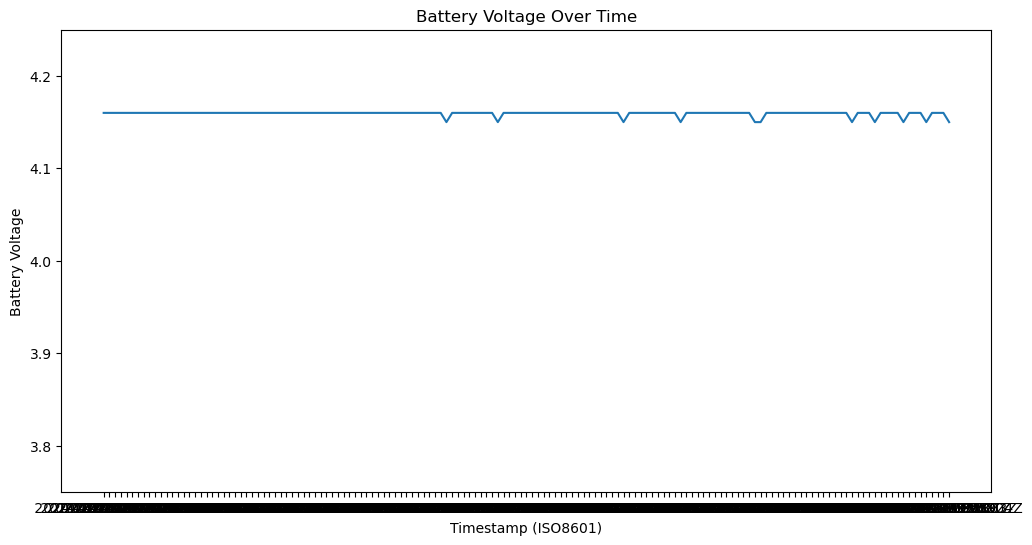

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(grass['timestamp_iso8601'], grass['battery_voltage'])
plt.ylim(3.75,4.25)
plt.xlabel('Timestamp (ISO8601)')
plt.ylabel('Battery Voltage')
plt.title('Battery Voltage Over Time')
plt.show()


In [7]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(grass.columns))))


def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = grass['timestamp_iso8601'][timestamp_index]
    test = grass['Test'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in grass.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

            # Define specific colors for certain wavelengths
            if wavelength == '410':
                color = 'purple'
            elif wavelength == '435':
                color = 'blue'
            elif wavelength == '460':
                color = 'dodgerblue'
            elif wavelength == '485':
                color = 'cyan'
            elif wavelength == '510':
                color = 'green'
            elif wavelength == '535':
                color = 'aqumarine'
            elif wavelength == '560':
                color = 'limegreen'
            elif wavelength == '585':
                color = 'yellow'
            elif wavelength == '610':
                color = 'orange'
            elif wavelength == '645':
                color = 'red'
            elif wavelength == '680':
                color = 'black'
            elif wavelength == '705':
                color = 'brown'
            elif wavelength == '730':
                color = 'gray'
            elif wavelength == '760':
                color = 'silver'
            elif wavelength == '810':
                color = 'lightgray'
            elif wavelength == '860':
                color = 'linen'
            elif wavelength == '900':
                color = 'wheat'
            elif wavelength == '940':
                color = 'gold'

            # Map custom colors to standard recognized color names
            # color = map_color(color)

            # Check if the column exists before using it
            if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in grass.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in grass.columns:
                wavelength_data = grass[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][timestamp_index]
                irradiance_data = grass[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][timestamp_index]
                wavelength_uncertainty = grass[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm'][timestamp_index]
                irradiance_uncertainty = grass[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared'][timestamp_index]

                # Create a Gaussian distribution
                x_values = np.linspace(wavelength_data - 3 * wavelength_uncertainty,
                                       wavelength_data + 3 * wavelength_uncertainty, 100)
                y_values = irradiance_data * np.exp(-0.5 * ((x_values - wavelength_data) / wavelength_uncertainty) ** 2)

                # Plot Gaussian distribution
                plt.plot(x_values, y_values, label=f'{wavelength}nm - {color}', linestyle='--', linewidth=2, color=color)

                # Plot data point with error bars
                plt.errorbar(wavelength_data, irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,
                             linestyle='', marker='o', markersize=5, capsize=5, color=color)

                  
   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')


    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.xlim(350,1000)
    #plt.ylim(0,8000)
    #plt.ylim(0,30)    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    #plt.title(f'Irradiance Over Wavelength by Timestamp {timestamp_index} and Batch {batch_index} for Backyard')
    #plt.title(f"Irradiance Over Wavelength by Timestamp Index {timestamp_index}: \n \n Test Pattern {grass['Test']} for Backyard")
    plt.title(f"Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {grass['Test']} for Backyard")


timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(grass) - 1, step=1, description='Timestamp Index')
batch_slider = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Batch Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider, batch_index=batch_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', max=148), Output()), _dom_classes=('wi…

---
---
---
# Now we will apply Normalization to our data per recommendations from Paul Mirel.

## Load White Standard data taken in same lighting conditions:

### Email from Paul Mirel of NASA, February 5, 2024: 
    It’s general practice to measure a white reference in the same illumination as the sample, and then to measure the sample. The unitless reflectance from the sample is then the sample signal divided by the white reference signal, in each wavelength. Landsat uses a stretch of desert sand, or a huge white tarp!, as a reference. Spectralon is the material of choice for white references, but it’s expensive. We get quite good results with ordinary white Styrofoam (without cover sheets), and are considering using white playground sand, or a plain white felt acrylic blanket. The goal is a material that scatters light equally in all directions, and does not have much, or any, specular shiny reflectance.

## Read in White card from full-sun normailzation

## The following is a single white card full sun reading, but was taken from the average of all of the full sun white card readings taken in this test.

In [8]:
#read the file
file = r'white_sunny_Feb9.xlsx'
white = pd.read_excel(file,index_col=False)

# Remove leading/trailing whitespaces in column names
white.columns = white.columns.str.strip()
white.head()

,device_type,software_version,UID,Test,batch,weekday,timestamp_iso8601,decimal_hour,bandwidth_FWHM_nm,field_of_view_FWHM_DEG,...,irradiance_900nm_wheat_wavelength_nm,irradiance_900nm_wheat_wavelength_uncertainty_nm,irradiance_900nm_wheat_irradiance_uW_per_cm_squared,irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared,irradiance_940nm_gold_wavelength_nm,irradiance_940nm_gold_wavelength_uncertainty_nm,irradiance_940nm_gold_irradiance_uW_per_cm_squared,irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared,battery_voltage,battery_percent
0,STELLA-Q2,2.4.0,6858,White Card,1,Friday,20240209T193027Z,19.501908,20,20,...,900,10,5487.67,658.520346,940,10,3653.816154,438.457769,4.16,98


In [9]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(white.columns))))


def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = white['timestamp_iso8601'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in white.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

            # Define specific colors for certain wavelengths
            if wavelength == '410':
                color = 'purple'
            elif wavelength == '435':
                color = 'blue'
            elif wavelength == '460':
                color = 'dodgerblue'
            elif wavelength == '485':
                color = 'cyan'
            elif wavelength == '510':
                color = 'green'
            elif wavelength == '535':
                color = 'aqumarine'
            elif wavelength == '560':
                color = 'limegreen'
            elif wavelength == '585':
                color = 'yellow'
            elif wavelength == '610':
                color = 'orange'
            elif wavelength == '645':
                color = 'red'
            elif wavelength == '680':
                color = 'black'
            elif wavelength == '705':
                color = 'brown'
            elif wavelength == '730':
                color = 'gray'
            elif wavelength == '760':
                color = 'silver'
            elif wavelength == '810':
                color = 'lightgray'
            elif wavelength == '860':
                color = 'linen'
            elif wavelength == '900':
                color = 'wheat'
            elif wavelength == '940':
                color = 'gold'

            # Map custom colors to standard recognized color names
            # color = map_color(color)

            # Check if the column exists before using it
            if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in white.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in white.columns:
                wavelength_data = white[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][timestamp_index]
                irradiance_data = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][timestamp_index]
                wavelength_uncertainty = white[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm'][timestamp_index]
                irradiance_uncertainty = white[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared'][timestamp_index]

                # Create a Gaussian distribution
                x_values = np.linspace(wavelength_data - 3 * wavelength_uncertainty,
                                       wavelength_data + 3 * wavelength_uncertainty, 100)
                y_values = irradiance_data * np.exp(-0.5 * ((x_values - wavelength_data) / wavelength_uncertainty) ** 2)

                # Plot Gaussian distribution
                plt.plot(x_values, y_values, label=f'{wavelength}nm - {color}', linestyle='--', linewidth=2, color=color)

                # Plot data point with error bars
                plt.errorbar(wavelength_data, irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,
                             linestyle='', marker='o', markersize=5, capsize=5, color=color)

                  
   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')


    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.xlim(350,1000)
    #plt.ylim(0,30)    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    plt.title(f'Irradiance Over Wavelength by Timestamp Index {timestamp_index} for White Standard averaged over many samples Full-Sun')


timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(white) - 1, step=1, description='Timestamp Index')
batch_slider = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Batch Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider, batch_index=batch_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', max=0), Output()), _dom_classes=('widg…

In [10]:
# Extract the white standard readings from the DataFrame

# Initialize white_standard_readings as an empty dictionary
white_standard_readings = {}


# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(white.columns))))

timestamp = white['timestamp_iso8601'][0]

for wavelength in wavelengths:
    wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
    wavelength_columns = [col for col in white.columns if re.search(wavelength_pattern, col)]

    for column in wavelength_columns:
        color = 'black'  # Default color for wavelengths not explicitly defined

        # Define specific colors for certain wavelengths
        if wavelength == '410':
            color = 'purple'
        elif wavelength == '435':
            color = 'blue'
        elif wavelength == '460':
            color = 'dodgerblue'
        elif wavelength == '485':
            color = 'cyan'
        elif wavelength == '510':
            color = 'green'
        elif wavelength == '535':
            color = 'aqumarine'
        elif wavelength == '560':
            color = 'limegreen'
        elif wavelength == '585':
            color = 'yellow'
        elif wavelength == '610':
            color = 'orange'
        elif wavelength == '645':
            color = 'red'
        elif wavelength == '680':
            color = 'black'
        elif wavelength == '705':
            color = 'brown'
        elif wavelength == '730':
            color = 'gray'
        elif wavelength == '760':
            color = 'silver'
        elif wavelength == '810':
            color = 'lightgray'
        elif wavelength == '860':
            color = 'linen'
        elif wavelength == '900':
            color = 'wheat'
        elif wavelength == '940':
            color = 'gold'

        # Map custom colors to standard recognized color names
        # color = map_color(color)

        # Check if the column exists before using it
        if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in white.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in white.columns:
            #wavelength_data = white[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][0]
            #irradiance_data = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][0]
            white_reading = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][0]
            white_standard_readings[wavelength] = white_reading
            
    print()
    print('1) This is the raw white card readings from our white card calibration:',white_reading, 'at', wavelength,'nm.')
  
    print()
    print('2) These are our white card standard wavelengths and readings from our spectrometer:',white_standard_readings,'used with wavelength', wavelength,'nm.')



# Calculate scaling factors using only white standard readings
scaling_factors = {}
for wavelength, white_reading in white_standard_readings.items():
    # Assuming the minimum possible reading is zero
    scaling_factor = 1.0 / white_reading
    scaling_factors[wavelength] = scaling_factor

    
    
print()
print('3) These are our wavelengths and white scaling factors:',scaling_factors)

# Print scaling factors
print()
print("Scaling Factors:")
for wavelength, factor in scaling_factors.items():
    print(f"4) These are our final wavelength and scaling factors per wavelength {wavelength}nm: {factor}")

    
#print([scaling_factors[factor] for wavelength in wavelengths])    


1) This is the raw white card readings from our white card calibration: 11344.342307692308 at 410 nm.

2) These are our white card standard wavelengths and readings from our spectrometer: {'410': 11344.342307692308} used with wavelength 410 nm.

1) This is the raw white card readings from our white card calibration: 19038.996153846154 at 435 nm.

2) These are our white card standard wavelengths and readings from our spectrometer: {'410': 11344.342307692308, '435': 19038.996153846154} used with wavelength 435 nm.

1) This is the raw white card readings from our white card calibration: 23041.196153846155 at 460 nm.

2) These are our white card standard wavelengths and readings from our spectrometer: {'410': 11344.342307692308, '435': 19038.996153846154, '460': 23041.196153846155} used with wavelength 460 nm.

1) This is the raw white card readings from our white card calibration: 21571.857692307698 at 485 nm.

2) These are our white card standard wavelengths and readings from our spectr

## Unitless Spectral Data for White Light card readings, Grass, Shady Grass and White Card reading in shade:

In [11]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(grass.columns))))

def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = grass['timestamp_iso8601'][timestamp_index]
    test = grass['Test'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in grass.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

        # Define specific colors for certain wavelengths
            if wavelength == '410':
                color = 'purple'
            elif wavelength == '435':
                color = 'blue'
            elif wavelength == '460':
                color = 'dodgerblue'
            elif wavelength == '485':
                color = 'cyan'
            elif wavelength == '510':
                color = 'green'
            elif wavelength == '535':
                color = 'aqumarine'
            elif wavelength == '560':
                color = 'limegreen'
            elif wavelength == '585':
                color = 'yellow'
            elif wavelength == '610':
                color = 'orange'
            elif wavelength == '645':
                color = 'red'
            elif wavelength == '680':
                color = 'black'
            elif wavelength == '705':
                color = 'brown'
            elif wavelength == '730':
                color = 'gray'
            elif wavelength == '760':
                color = 'silver'
            elif wavelength == '810':
                color = 'lightgray'
            elif wavelength == '860':
                color = 'linen'
            elif wavelength == '900':
                color = 'wheat'
            elif wavelength == '940':
                color = 'gold'

            # Check if the column exists before using it
            if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in grass.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in grass.columns:
                wavelength_data = grass[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][timestamp_index]
                irradiance_data = grass[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][timestamp_index]
                wavelength_uncertainty = grass[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm'][timestamp_index]
                irradiance_uncertainty = grass[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared'][timestamp_index]

                # Apply scaling factor to correct irradiance data
                scaling_factor = scaling_factors[wavelength]
                #print(scaling_factor)
                corrected_irradiance_data = irradiance_data * scaling_factor

                
                # Create a Gaussian distribution
                x_values = np.linspace(wavelength_data - 3 * wavelength_uncertainty,
                                       wavelength_data + 3 * wavelength_uncertainty, 100)
                y_values = corrected_irradiance_data * np.exp(-0.5 * ((x_values - wavelength_data) / wavelength_uncertainty) ** 2)

                # Plot Gaussian distribution
                plt.plot(x_values, y_values, label=f'{wavelength}nm - {color}', linestyle='--', linewidth=2, color=color)

                # Plot data point with error bars
                #plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,
                #             linestyle='', marker='o', markersize=5, capsize=5, color=color)
                plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty*scaling_factor,
                              linestyle='', marker='o', markersize=5, capsize=5, color=color)

                
                
                
                # Plot data point with error bars (same as before)
                  
   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')




    # Display the plot
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Corrected Irradiance (uW/cm^2)')  # Updated ylabel to reflect correction
    plt.xlim(350,1000)
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    #plt.title(f'Corrected Irradiance Over Wavelength by Timestamp {timestamp} and Batch {batch_index} for Backyard')
    plt.title(f"Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {grass['Test']} for Backyard")




                  

timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(grass) - 1, step=1, description='Timestamp Index')
batch_slider = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Batch Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider, batch_index=batch_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', max=148), Output()), _dom_classes=('wi…

## Qc White Card Correction Factors being used

In [12]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(grass.columns))))

def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = grass['timestamp_iso8601'][timestamp_index]
    test = grass['Test'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in grass.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

        # Define specific colors for certain wavelengths
            if wavelength == '410':
                color = 'purple'
            elif wavelength == '435':
                color = 'blue'
            elif wavelength == '460':
                color = 'dodgerblue'
            elif wavelength == '485':
                color = 'cyan'
            elif wavelength == '510':
                color = 'green'
            elif wavelength == '535':
                color = 'aqumarine'
            elif wavelength == '560':
                color = 'limegreen'
            elif wavelength == '585':
                color = 'yellow'
            elif wavelength == '610':
                color = 'orange'
            elif wavelength == '645':
                color = 'red'
            elif wavelength == '680':
                color = 'black'
            elif wavelength == '705':
                color = 'brown'
            elif wavelength == '730':
                color = 'gray'
            elif wavelength == '760':
                color = 'silver'
            elif wavelength == '810':
                color = 'lightgray'
            elif wavelength == '860':
                color = 'linen'
            elif wavelength == '900':
                color = 'wheat'
            elif wavelength == '940':
                color = 'gold'

            # Check if the column exists before using it
            if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in grass.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in grass.columns:
                wavelength_data = grass[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][timestamp_index]
                irradiance_data = grass[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][timestamp_index]
                wavelength_uncertainty = grass[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm'][timestamp_index]
                irradiance_uncertainty = grass[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared'][timestamp_index]

                # Apply scaling factor to correct irradiance data
                scaling_factor = scaling_factors[wavelength]
                print('Actual Scaling Factor:', scaling_factor, 'or Scaling Factor(', scaling_factor, ') x Reading (',irradiance_data, ')=',round(scaling_factor*irradiance_data,2), 'as a unitless calibrated reading')
                corrected_irradiance_data = irradiance_data * scaling_factor

                
                # Create a Gaussian distribution
                x_values = np.linspace(wavelength_data - 3 * wavelength_uncertainty,
                                       wavelength_data + 3 * wavelength_uncertainty, 100)
                y_values = corrected_irradiance_data * np.exp(-0.5 * ((x_values - wavelength_data) / wavelength_uncertainty) ** 2)

                # Plot Gaussian distribution
                plt.plot(x_values, y_values, label=f'{wavelength}nm - {color}', linestyle='--', linewidth=2, color=color)

                # Plot data point with error bars
                #plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,
                #             linestyle='', marker='o', markersize=5, capsize=5, color=color)
                plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty*scaling_factor,
                              linestyle='', marker='o', markersize=5, capsize=5, color=color)

                
                
                
                # Plot data point with error bars (same as before)
                  
   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')




    # Display the plot
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Corrected Irradiance (uW/cm^2)')  # Updated ylabel to reflect correction
    plt.xlim(350,1000)
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    plt.title(f"Qc (look at printout of scaling factors) of White Card Corrected Irradiance Over Wavelength by Grass Reading '{test}' from Backyard")
    #plt.title(f"Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {grass['Test']}")




                  

timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(grass) - 1, step=1, description='Timestamp Index')
batch_slider = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Batch Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider, batch_index=batch_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', max=148), Output()), _dom_classes=('wi…

---
---
# Read in White Card Readings from Shady White normailzation

## The following is a single white card shade reading, but was taken from the average of all of the shady white card readings taken in this test.

In [13]:
#read the file
file = r'data_whiteshade.xlsx'
white = pd.read_excel(file,index_col=False)

# Remove leading/trailing whitespaces in column names
white.columns = white.columns.str.strip()
white.head()

,device_type,software_version,UID,Test,batch,weekday,timestamp_iso8601,decimal_hour,bandwidth_FWHM_nm,field_of_view_FWHM_DEG,...,irradiance_900nm_wheat_wavelength_nm,irradiance_900nm_wheat_wavelength_uncertainty_nm,irradiance_900nm_wheat_irradiance_uW_per_cm_squared,irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared,irradiance_940nm_gold_wavelength_nm,irradiance_940nm_gold_wavelength_uncertainty_nm,irradiance_940nm_gold_irradiance_uW_per_cm_squared,irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared,battery_voltage,battery_percent
0,STELLA-Q2,2.4.0,6858,White Card Shade,3,Friday,20240209T193804Z,19.630542,20,20,...,900,10,709.604737,85.152526,940,10,460.540842,55.264947,4.157368,97


In [14]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(white.columns))))


def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = white['timestamp_iso8601'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in white.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

            # Define specific colors for certain wavelengths
            if wavelength == '410':
                color = 'purple'
            elif wavelength == '435':
                color = 'blue'
            elif wavelength == '460':
                color = 'dodgerblue'
            elif wavelength == '485':
                color = 'cyan'
            elif wavelength == '510':
                color = 'green'
            elif wavelength == '535':
                color = 'aqumarine'
            elif wavelength == '560':
                color = 'limegreen'
            elif wavelength == '585':
                color = 'yellow'
            elif wavelength == '610':
                color = 'orange'
            elif wavelength == '645':
                color = 'red'
            elif wavelength == '680':
                color = 'black'
            elif wavelength == '705':
                color = 'brown'
            elif wavelength == '730':
                color = 'gray'
            elif wavelength == '760':
                color = 'silver'
            elif wavelength == '810':
                color = 'lightgray'
            elif wavelength == '860':
                color = 'linen'
            elif wavelength == '900':
                color = 'wheat'
            elif wavelength == '940':
                color = 'gold'

            # Map custom colors to standard recognized color names
            # color = map_color(color)

            # Check if the column exists before using it
            if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in white.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in white.columns:
                wavelength_data = white[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][timestamp_index]
                irradiance_data = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][timestamp_index]
                wavelength_uncertainty = white[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm'][timestamp_index]
                irradiance_uncertainty = white[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared'][timestamp_index]

                # Create a Gaussian distribution
                x_values = np.linspace(wavelength_data - 3 * wavelength_uncertainty,
                                       wavelength_data + 3 * wavelength_uncertainty, 100)
                y_values = irradiance_data * np.exp(-0.5 * ((x_values - wavelength_data) / wavelength_uncertainty) ** 2)

                # Plot Gaussian distribution
                plt.plot(x_values, y_values, label=f'{wavelength}nm - {color}', linestyle='--', linewidth=2, color=color)

                # Plot data point with error bars
                plt.errorbar(wavelength_data, irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,
                             linestyle='', marker='o', markersize=5, capsize=5, color=color)

                  
   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')


    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.xlim(350,1000)
    #plt.ylim(0,30)    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    plt.title(f'Irradiance Over Wavelength by Timestamp Index {timestamp_index} for White Standard averaged over many samples Full-Sun')


timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(white) - 1, step=1, description='Timestamp Index')
batch_slider = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Batch Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider, batch_index=batch_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', max=0), Output()), _dom_classes=('widg…

In [15]:
# Extract the white standard readings from the DataFrame

# Initialize white_standard_readings as an empty dictionary
white_standard_readings = {}


# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(white.columns))))

timestamp = white['timestamp_iso8601'][0]

for wavelength in wavelengths:
    wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
    wavelength_columns = [col for col in white.columns if re.search(wavelength_pattern, col)]

    for column in wavelength_columns:
        color = 'black'  # Default color for wavelengths not explicitly defined

        # Define specific colors for certain wavelengths
        if wavelength == '410':
            color = 'purple'
        elif wavelength == '435':
            color = 'blue'
        elif wavelength == '460':
            color = 'dodgerblue'
        elif wavelength == '485':
            color = 'cyan'
        elif wavelength == '510':
            color = 'green'
        elif wavelength == '535':
            color = 'aqumarine'
        elif wavelength == '560':
            color = 'limegreen'
        elif wavelength == '585':
            color = 'yellow'
        elif wavelength == '610':
            color = 'orange'
        elif wavelength == '645':
            color = 'red'
        elif wavelength == '680':
            color = 'black'
        elif wavelength == '705':
            color = 'brown'
        elif wavelength == '730':
            color = 'gray'
        elif wavelength == '760':
            color = 'silver'
        elif wavelength == '810':
            color = 'lightgray'
        elif wavelength == '860':
            color = 'linen'
        elif wavelength == '900':
            color = 'wheat'
        elif wavelength == '940':
            color = 'gold'

        # Map custom colors to standard recognized color names
        # color = map_color(color)

        # Check if the column exists before using it
        if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in white.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in white.columns:
            #wavelength_data = white[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][0]
            #irradiance_data = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][0]
            white_reading = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][0]
            white_standard_readings[wavelength] = white_reading
            
    print()
    print('1) This is the raw white card readings from our white card calibration:',white_reading, 'at', wavelength,'nm.')
  
    print()
    print('2) These are our white card standard wavelengths and readings from our spectrometer:',white_standard_readings,'used with wavelength', wavelength,'nm.')



# Calculate scaling factors using only white standard readings
scaling_factors = {}
for wavelength, white_reading in white_standard_readings.items():
    # Assuming the minimum possible reading is zero
    scaling_factor = 1.0 / white_reading
    scaling_factors[wavelength] = scaling_factor

    
    
print()
print('3) These are our wavelengths and white scaling factors:',scaling_factors)

# Print scaling factors
print()
print("Scaling Factors:")
for wavelength, factor in scaling_factors.items():
    print(f"4) These are our final wavelength and scaling factors per wavelength {wavelength}nm: {factor}")

    
#print([scaling_factors[factor] for wavelength in wavelengths])    


1) This is the raw white card readings from our white card calibration: 1184.5684210526317 at 410 nm.

2) These are our white card standard wavelengths and readings from our spectrometer: {'410': 1184.5684210526317} used with wavelength 410 nm.

1) This is the raw white card readings from our white card calibration: 1800.1378947368423 at 435 nm.

2) These are our white card standard wavelengths and readings from our spectrometer: {'410': 1184.5684210526317, '435': 1800.1378947368423} used with wavelength 435 nm.

1) This is the raw white card readings from our white card calibration: 2069.527368421053 at 460 nm.

2) These are our white card standard wavelengths and readings from our spectrometer: {'410': 1184.5684210526317, '435': 1800.1378947368423, '460': 2069.527368421053} used with wavelength 460 nm.

1) This is the raw white card readings from our white card calibration: 1756.1515789473683 at 485 nm.

2) These are our white card standard wavelengths and readings from our spectrom

## Unitless Spectral Data for Shady White Light card readings, Grass, Shady Grass and White Card reading in shade:

In [16]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(grass.columns))))

def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = grass['timestamp_iso8601'][timestamp_index]
    test = grass['Test'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in grass.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

        # Define specific colors for certain wavelengths
            if wavelength == '410':
                color = 'purple'
            elif wavelength == '435':
                color = 'blue'
            elif wavelength == '460':
                color = 'dodgerblue'
            elif wavelength == '485':
                color = 'cyan'
            elif wavelength == '510':
                color = 'green'
            elif wavelength == '535':
                color = 'aqumarine'
            elif wavelength == '560':
                color = 'limegreen'
            elif wavelength == '585':
                color = 'yellow'
            elif wavelength == '610':
                color = 'orange'
            elif wavelength == '645':
                color = 'red'
            elif wavelength == '680':
                color = 'black'
            elif wavelength == '705':
                color = 'brown'
            elif wavelength == '730':
                color = 'gray'
            elif wavelength == '760':
                color = 'silver'
            elif wavelength == '810':
                color = 'lightgray'
            elif wavelength == '860':
                color = 'linen'
            elif wavelength == '900':
                color = 'wheat'
            elif wavelength == '940':
                color = 'gold'

            # Check if the column exists before using it
            if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in grass.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in grass.columns:
                wavelength_data = grass[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][timestamp_index]
                irradiance_data = grass[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][timestamp_index]
                wavelength_uncertainty = grass[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm'][timestamp_index]
                irradiance_uncertainty = grass[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared'][timestamp_index]

                # Apply scaling factor to correct irradiance data
                scaling_factor = scaling_factors[wavelength]
                #print(scaling_factor)
                corrected_irradiance_data = irradiance_data * scaling_factor

                
                # Create a Gaussian distribution
                x_values = np.linspace(wavelength_data - 3 * wavelength_uncertainty,
                                       wavelength_data + 3 * wavelength_uncertainty, 100)
                y_values = corrected_irradiance_data * np.exp(-0.5 * ((x_values - wavelength_data) / wavelength_uncertainty) ** 2)

                # Plot Gaussian distribution
                plt.plot(x_values, y_values, label=f'{wavelength}nm - {color}', linestyle='--', linewidth=2, color=color)

                # Plot data point with error bars
                #plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,
                #             linestyle='', marker='o', markersize=5, capsize=5, color=color)
                plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty*scaling_factor,
                              linestyle='', marker='o', markersize=5, capsize=5, color=color)

                
                
                
                # Plot data point with error bars (same as before)
                  
   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')




    # Display the plot
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Corrected Irradiance (uW/cm^2)')  # Updated ylabel to reflect correction
    plt.xlim(350,1000)
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    #plt.title(f'Corrected Irradiance Over Wavelength by Timestamp {timestamp} and Batch {batch_index} for Backyard')
    plt.title(f"Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {grass['Test']} for Backyard")




                  

timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(grass) - 1, step=1, description='Timestamp Index')
batch_slider = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Batch Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider, batch_index=batch_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', max=148), Output()), _dom_classes=('wi…

## Qc White Card Correction Factors being used

In [17]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(grass.columns))))

def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = grass['timestamp_iso8601'][timestamp_index]
    test = grass['Test'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in grass.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

        # Define specific colors for certain wavelengths
            if wavelength == '410':
                color = 'purple'
            elif wavelength == '435':
                color = 'blue'
            elif wavelength == '460':
                color = 'dodgerblue'
            elif wavelength == '485':
                color = 'cyan'
            elif wavelength == '510':
                color = 'green'
            elif wavelength == '535':
                color = 'aqumarine'
            elif wavelength == '560':
                color = 'limegreen'
            elif wavelength == '585':
                color = 'yellow'
            elif wavelength == '610':
                color = 'orange'
            elif wavelength == '645':
                color = 'red'
            elif wavelength == '680':
                color = 'black'
            elif wavelength == '705':
                color = 'brown'
            elif wavelength == '730':
                color = 'gray'
            elif wavelength == '760':
                color = 'silver'
            elif wavelength == '810':
                color = 'lightgray'
            elif wavelength == '860':
                color = 'linen'
            elif wavelength == '900':
                color = 'wheat'
            elif wavelength == '940':
                color = 'gold'

            # Check if the column exists before using it
            if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in grass.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in grass.columns:
                wavelength_data = grass[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][timestamp_index]
                irradiance_data = grass[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][timestamp_index]
                wavelength_uncertainty = grass[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm'][timestamp_index]
                irradiance_uncertainty = grass[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared'][timestamp_index]

                # Apply scaling factor to correct irradiance data
                scaling_factor = scaling_factors[wavelength]
                print('Actual Scaling Factor:', scaling_factor, 'or Scaling Factor(', scaling_factor, ') x Reading (',irradiance_data, ')=',round(scaling_factor*irradiance_data,2), 'as a unitless calibrated reading')
                corrected_irradiance_data = irradiance_data * scaling_factor

                
                # Create a Gaussian distribution
                x_values = np.linspace(wavelength_data - 3 * wavelength_uncertainty,
                                       wavelength_data + 3 * wavelength_uncertainty, 100)
                y_values = corrected_irradiance_data * np.exp(-0.5 * ((x_values - wavelength_data) / wavelength_uncertainty) ** 2)

                # Plot Gaussian distribution
                plt.plot(x_values, y_values, label=f'{wavelength}nm - {color}', linestyle='--', linewidth=2, color=color)

                # Plot data point with error bars
                #plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,
                #             linestyle='', marker='o', markersize=5, capsize=5, color=color)
                plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty*scaling_factor,
                              linestyle='', marker='o', markersize=5, capsize=5, color=color)

                
                
                
                # Plot data point with error bars (same as before)
                  
   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')




    # Display the plot
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Corrected Irradiance (uW/cm^2)')  # Updated ylabel to reflect correction
    plt.xlim(350,1000)
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    plt.title(f"Qc (look at printout of scaling factors) of White Card Corrected Irradiance Over Wavelength by Grass Reading '{test}' from Backyard")
    #plt.title(f"Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {grass['Test']}")




                  

timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(grass) - 1, step=1, description='Timestamp Index')
batch_slider = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Batch Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider, batch_index=batch_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', max=148), Output()), _dom_classes=('wi…